In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#!/bin/bash
!curl -L -o stacksample.zip https://www.kaggle.com/api/v1/datasets/download/stackoverflow/stacksample

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1134M  100 1134M    0     0  21.2M      0  0:00:53  0:00:53 --:--:-- 22.8M


In [ ]:
! unzip stacksample.zip

Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [ ]:
df_q = pd.read_csv('Questions.csv', encoding='ISO-8859-1')
df_t = pd.read_csv('Tags.csv', encoding='ISO-8859-1')

In [ ]:
df_q.head(), df_q.shape

(    Id  OwnerUserId          CreationDate            ClosedDate  Score  \
 0   80         26.0  2008-08-01T13:57:07Z                   NaN     26   
 1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   
 2  120         83.0  2008-08-01T15:50:08Z                   NaN     21   
 3  180    2089740.0  2008-08-01T18:42:19Z                   NaN     53   
 4  260         91.0  2008-08-01T23:22:08Z                   NaN     49   
 
                                                Title  \
 0  SQLStatement.execute() - multiple queries in o...   
 1  Good branching and merging tutorials for Torto...   
 2                                  ASP.NET Site Maps   
 3                 Function for creating color wheels   
 4  Adding scripting functionality to .NET applica...   
 
                                                 Body  
 0  <p>I've written a database generation script i...  
 1  <p>Are there any really good tutorials explain...  
 2  <p>Has anyone got experience cre

In [ ]:
df_t.shape, df_t.head()

((3750994, 2),
    Id             Tag
 0  80            flex
 1  80  actionscript-3
 2  80             air
 3  90             svn
 4  90     tortoisesvn)

In [ ]:
df_t_grouped = df_t.groupby("Id")["Tag"].apply(list).reset_index()
df_t_grouped.head()

,Id,Tag
0,80,"[flex, actionscript-3, air]"
1,90,"[svn, tortoisesvn, branch, branching-and-merging]"
2,120,"[sql, asp.net, sitemap]"
3,180,"[algorithm, language-agnostic, colors, color-s..."
4,260,"[c#, .net, scripting, compiler-construction]"


In [ ]:
df = pd.merge(df_q, df_t_grouped, on="Id", how="inner")
df.head(), df.shape

(    Id  OwnerUserId          CreationDate            ClosedDate  Score  \
 0   80         26.0  2008-08-01T13:57:07Z                   NaN     26   
 1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   
 2  120         83.0  2008-08-01T15:50:08Z                   NaN     21   
 3  180    2089740.0  2008-08-01T18:42:19Z                   NaN     53   
 4  260         91.0  2008-08-01T23:22:08Z                   NaN     49   
 
                                                Title  \
 0  SQLStatement.execute() - multiple queries in o...   
 1  Good branching and merging tutorials for Torto...   
 2                                  ASP.NET Site Maps   
 3                 Function for creating color wheels   
 4  Adding scripting functionality to .NET applica...   
 
                                                 Body  \
 0  <p>I've written a database generation script i...   
 1  <p>Are there any really good tutorials explain...   
 2  <p>Has anyone got experience 

In [ ]:
df = df.head(10000)

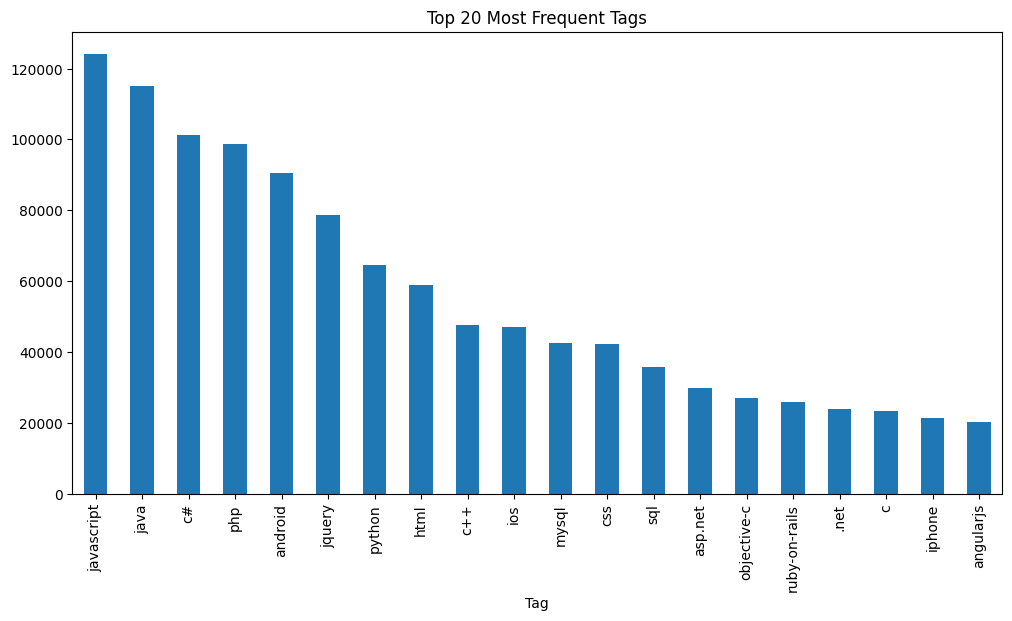

In [ ]:
tag_counts = df_t["Tag"].value_counts().head(20)
plt.figure(figsize=(12,6))
tag_counts.plot(kind='bar')
plt.title("Top 20 Most Frequent Tags")
plt.show()

In [ ]:
unique_tags = np.unique(df["Tag"].astype(str))
len(unique_tags)

8475

In [ ]:
### so we have 3.7 million data and 37k classes that we want to classify them into these calsses
## and we are going to use the transformers of hugging face for this
## multi label classification using transformers pretrained using the finetuning

!pip install -q transformers datasets scikit-learn;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
print(df["Tag"].head())
print("\nMissing values:", df["Tag"].isna().sum())

0                          [flex, actionscript-3, air]
1    [svn, tortoisesvn, branch, branching-and-merging]
2                              [sql, asp.net, sitemap]
3    [algorithm, language-agnostic, colors, color-s...
4         [c#, .net, scripting, compiler-construction]
Name: Tag, dtype: object

Missing values: 0


In [ ]:
df_cleaned = df[df["Tag"].apply(lambda x: isinstance(x, list) and len(x) > 0)]
df_cleaned.head()
df_cleaned = df_cleaned.drop(columns=str.split("Id	OwnerUserId	CreationDate	ClosedDate	Score"))
df_cleaned.head()

,Title,Body,Tag
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]"
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]"
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"[algorithm, language-agnostic, colors, color-s..."
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net, scripting, compiler-construction]"


In [ ]:
# Clean the Tag column:
df_cleaned["Tag"] = df_cleaned["Tag"].apply(
    lambda tags: [str(tag) for tag in tags if not pd.isna(tag)]
)

# Drop rows with empty tags (optional):
df_cleaned = df_cleaned[df_cleaned["Tag"].apply(len) > 0]

In [ ]:
df_cleaned.shape

(10000, 3)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Encode tags into a binary matrix
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df_cleaned["Tag"])

print("Encoded tags shape:", tag_matrix.shape)
print("Example tags:", mlb.classes_[:5])  # Show first 5 classes

Encoded tags shape: (10000, 4297)
Example tags: ['.htaccess' '.net' '.net-1.1' '.net-2.0' '.net-3.0']


In [ ]:
!pip install iterative-stratification

In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

# Initialize the splitter
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
train_idx, temp_idx = next(msss.split(df, tag_matrix))
train_df, temp_df = df.iloc[train_idx], df.iloc[temp_idx]
train_tags, temp_tags = tag_matrix[train_idx], tag_matrix[temp_idx]

# Split temp into validation and test
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
valid_idx, test_idx = next(msss.split(temp_df, temp_tags))
valid_df, test_df = temp_df.iloc[valid_idx], temp_df.iloc[test_idx]
valid_tags, test_tags = temp_tags[valid_idx], temp_tags[test_idx]

In [ ]:
train_df.shape, valid_df.shape, test_df.shape

((8072, 8), (943, 8), (985, 8))

In [ ]:
### as we have set the dataframe now we want to go for train

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load pretrained tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(mlb.classes_),  # Number of unique tags
    problem_type="multi_label_classification"  # Specify multi-label classification
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
### tokenize the text and encode it then train it using the encodings

# Combine Title and Body (if available) into a single text column
train_df["Text"] = train_df["Title"] + " " + train_df["Body"]
valid_df["Text"] = valid_df["Title"] + " " + valid_df["Body"]
test_df["Text"] = test_df["Title"] + " " + test_df["Body"]

# Tokenize the text data
def tokenize_data(texts, max_length=512):
    return tokenizer(
        texts.tolist(),  # Convert to list for tokenizer
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"  # Return PyTorch tensors
    )

# Tokenize train, validation, and test data
train_encodings = tokenize_data(train_df["Text"])
valid_encodings = tokenize_data(valid_df["Text"])
test_encodings = tokenize_data(test_df["Text"])

<ipython-input-28-956adb3512a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Text"] = train_df["Title"] + " " + train_df["Body"]
<ipython-input-28-956adb3512a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["Text"] = valid_df["Title"] + " " + valid_df["Body"]
<ipython-input-28-956adb3512a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
import torch
from torch.utils.data import Dataset

class TagDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = TagDataset(train_encodings, train_tags)
valid_dataset = TagDataset(valid_encodings, valid_tags)
test_dataset = TagDataset(test_encodings, test_tags)

In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save model checkpoints
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=4,  # Batch size for training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    warmup_steps=500,  # Warmup steps for learning rate scheduler
    weight_decay=0.01,  # Weight decay for regularization
    logging_dir="./logs",  # Directory for logs
    evaluation_strategy="epoch",  # Evaluate every epoch
    save_strategy="epoch",  # Save model every epoch
    learning_rate=2e-5,  # Learning rate
    load_best_model_at_end=True,
    report_to='none'# Load the best model at the end of training
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.010300,0.008508
2,0.005700,0.005308
3,0.005100,0.004827


TrainOutput(global_step=6054, training_loss=0.040248539888272004, metrics={'train_runtime': 2739.2058, 'train_samples_per_second': 8.841, 'train_steps_per_second': 2.21, 'total_flos': 6617201826078720.0, 'train_loss': 0.040248539888272004, 'epoch': 3.0})

In [ ]:
model.save_pretrained("./saved_model")

In [ ]:
# Evaluate on the validation set
val_results = trainer.evaluate()
print("Validation results:", val_results)

# Evaluate on the test set
test_results = trainer.evaluate(test_dataset)
print("Test results:", test_results)

Validation results: {'eval_loss': 0.004827412310987711, 'eval_runtime': 28.2615, 'eval_samples_per_second': 33.367, 'eval_steps_per_second': 4.175, 'epoch': 3.0}
Test results: {'eval_loss': 0.004710022360086441, 'eval_runtime': 29.4038, 'eval_samples_per_second': 33.499, 'eval_steps_per_second': 4.217, 'epoch': 3.0}


In [ ]:
from huggingface_hub import login

# Log in to Hugging Face
login(token="")

In [ ]:
model.push_to_hub("navidfalah/bert-multi-label-classification-stackoverflow-tags")

model.safetensors:   0%|          | 0.00/451M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/navidfalah/bert-multi-label-classification-stackoverflow-tags/commit/713d6221b791523185f9ae92657f9d5a8ca0e7d8', commit_message='Upload BertForSequenceClassification', commit_description='', oid='713d6221b791523185f9ae92657f9d5a8ca0e7d8', pr_url=None, repo_url=RepoUrl('https://huggingface.co/navidfalah/bert-multi-label-classification-stackoverflow-tags', endpoint='https://huggingface.co', repo_type='model', repo_id='navidfalah/bert-multi-label-classification-stackoverflow-tags'), pr_revision=None, pr_num=None)